# M74

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize
import scipy.stats

%matplotlib inline

## B filter

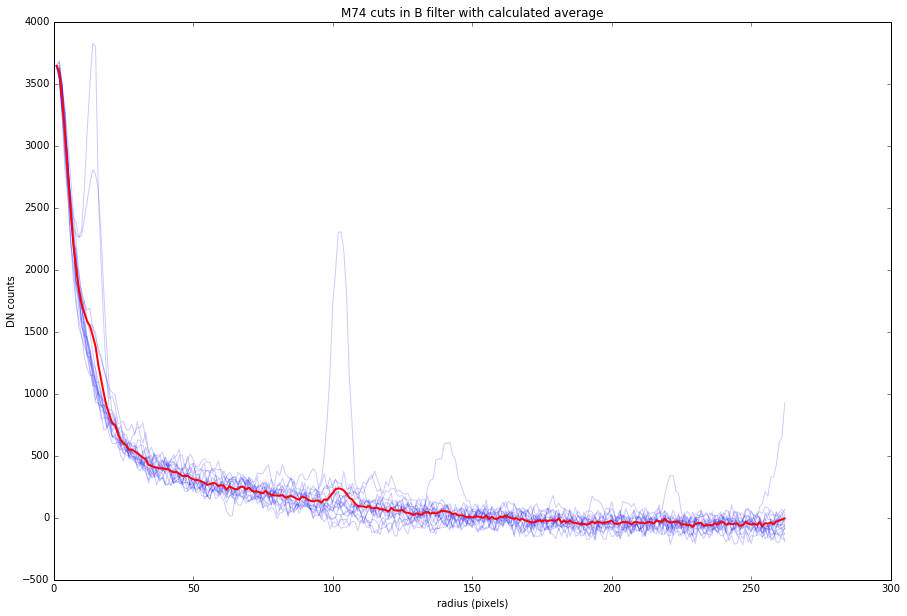

In [2]:
#mean sky level, standard deviation, etc from AIJ
mean_sky = 4871.436
sky_std = 45.522
area = 14960
#relatively small size of standard deviation in mean sky value means it's negligible compared to standard deviation of the galaxy
sky_std_mean = sky_std / np.sqrt(area)

#loading M74 B data and subtracting mean sky value to get just galaxy counts
m74_b = np.loadtxt('m74B.txt')
pix = m74_b[:,0]
cut_1 = m74_b[:,1] - mean_sky
cut_2 = m74_b[:,2] - mean_sky
cut_3 = m74_b[:,3] - mean_sky
cut_4 = m74_b[:,4] - mean_sky
cut_5 = m74_b[:,5] - mean_sky
cut_6 = m74_b[:,6] - mean_sky
cut_7 = m74_b[:,7] - mean_sky
cut_8 = m74_b[:,8] - mean_sky
cut_9 = m74_b[:,9] - mean_sky
cut_10 = m74_b[:,10] - mean_sky
cut_11 = m74_b[:,11] - mean_sky
cut_12 = m74_b[:,12] - mean_sky
cut_13 = m74_b[:,13] - mean_sky
cut_14 = m74_b[:,14] - mean_sky
cut_15 = m74_b[:,15] - mean_sky
cut_16 = m74_b[:,16] - mean_sky
cut_17 = m74_b[:,17] - mean_sky
#mean and standard deviation of cuts calculated in Excel spreadsheet with data
mean = m74_b[:,18] - mean_sky
std = m74_b[:,19]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.2)
plt.plot(pix, cut_2, "b-", alpha=0.2)
plt.plot(pix, cut_3, "b-", alpha=0.2)
plt.plot(pix, cut_4, "b-", alpha=0.2)
plt.plot(pix, cut_5, "b-", alpha=0.2)
plt.plot(pix, cut_6, "b-", alpha=0.2)
plt.plot(pix, cut_7, "b-", alpha=0.2)
plt.plot(pix, cut_8, "b-", alpha=0.2)
plt.plot(pix, cut_9, "b-", alpha=0.2)
plt.plot(pix, cut_10, "b-", alpha=0.2)
plt.plot(pix, cut_11, "b-", alpha=0.2)
plt.plot(pix, cut_12, "b-", alpha=0.2)
plt.plot(pix, cut_13, "b-", alpha=0.2)
plt.plot(pix, cut_14, "b-", alpha=0.2)
plt.plot(pix, cut_15, "b-", alpha=0.2)
plt.plot(pix, cut_16, "b-", alpha=0.2)
plt.plot(pix, cut_17, "b-", alpha=0.2)
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('M74 cuts in B filter with calculated average')

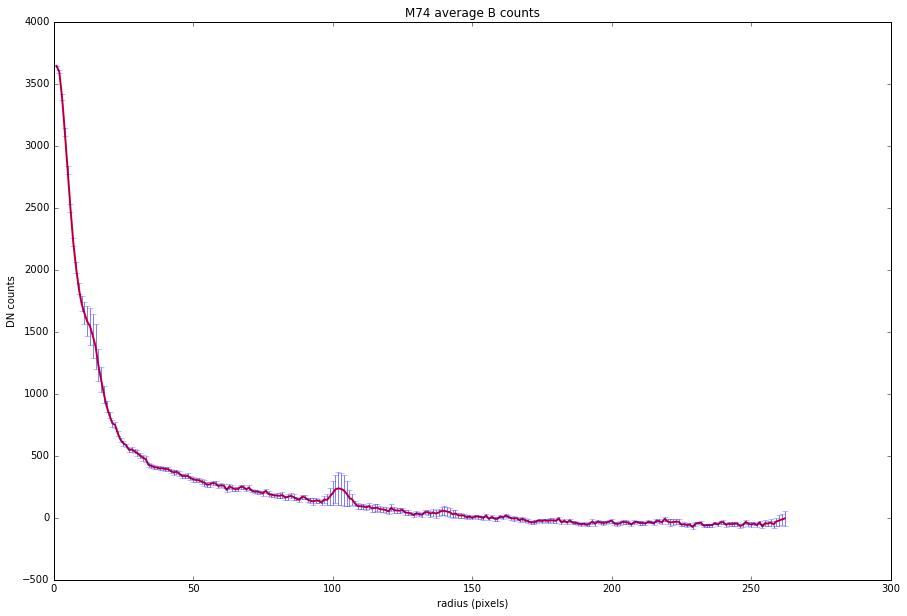

In [3]:
#calculating standard deviation of the calculated mean
std_mean = std / np.sqrt(17)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('M74 average B counts')

As expected, it looks like the changes in the magnitude of M74 are linearly related to changes in radius (magnitude increasing as radius increases, which means a decrease in brightness!). The "bulge" section of the data does not match this fit, also as expected.

In [4]:
#ref star GPM 24.060828+15.727722 located at FITS(935,729) in combined M74 B image
ref_bmag = 14.83
#using source radius of 12pix, inner sky annulus radius 20pix, outer sky annulus radius 30pix
ref_DN = 3.5e5
zeropoint = ref_bmag + 2.5 * np.log10(ref_DN)

#converting DN counts to magnitudes using zeropoint calculated above
mean_mags = zeropoint - 2.5 * np.log10(mean)

#using M74's distance away from us to calculate size of radii
dist = 9.2e3 #kpc
angles = (pix / 3600) * (np.pi / 180) #converting from arcsec to degrees to radians
r_kpc = dist * np.tan(angles)

#defining linear model to calculate surface brightness profile best fit
#(magnitudes are a log of the counts - the function for surface brightness becomes linear instead of exponential)
def linear_model(constant, A, R):
    return A + R*constant

#plugging in the disk section of M74 cuts to find best fit parameters for M74
popt, pcov = scipy.optimize.curve_fit(linear_model, r_kpc[100:262], mean_mags[100:262])
print'linear best-fit parameters:', popt
popt_uncertainties = np.sqrt(np.diag(pcov))
print'uncertainties in best-fit parameters:', popt_uncertainties

#calculating best fit line using measured radii and parameters above
best_fit_lin = linear_model(r_kpc, popt[0], popt[1])

fig = plt.figure(figsize=(15,10))
plt.plot(r_kpc, mean_mags, "r-", linewidth=2.0)
plt.plot(r_kpc, best_fit_lin)
plt.xlabel('radius (kpc)')
plt.ylabel('magnitudes/arcsec^2')
plt.title('M74 B magnitude as a function of radius')

C:\Users\owner\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in log10


ValueError: array must not contain infs or NaNs

## V filter

In [ ]:
#mean sky level, standard deviation, etc from AIJ
mean_sky = 6257.937
sky_std = 39.642
area = 17376
#relatively small size of standard deviation in mean sky value means it's negligible compared to standard deviation of the galaxy
sky_std_mean = sky_std / np.sqrt(area)

#loading M74 V data and subtracting mean sky value to get just galaxy counts
m74_v = np.loadtxt('m74V.txt')
pix = m74_v[:,0]
cut_1 = m74_v[:,1] - mean_sky
cut_2 = m74_v[:,2] - mean_sky
cut_3 = m74_v[:,3] - mean_sky
cut_4 = m74_v[:,4] - mean_sky
cut_5 = m74_v[:,5] - mean_sky
cut_6 = m74_v[:,6] - mean_sky
cut_7 = m74_v[:,7] - mean_sky
cut_8 = m74_v[:,8] - mean_sky
cut_9 = m74_v[:,9] - mean_sky
cut_10 = m74_v[:,10] - mean_sky
cut_11 = m74_v[:,11] - mean_sky
cut_12 = m74_v[:,12] - mean_sky
cut_13 = m74_v[:,13] - mean_sky
cut_14 = m74_v[:,14] - mean_sky
cut_15 = m74_v[:,15] - mean_sky
cut_16 = m74_v[:,16] - mean_sky
cut_17 = m74_v[:,17] - mean_sky
#mean and standard deviation of cuts calculated in Excel spreadsheet with data
mean = m74_v[:,18] - mean_sky
std = m74_v[:,19]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.2)
plt.plot(pix, cut_2, "b-", alpha=0.2)
plt.plot(pix, cut_3, "b-", alpha=0.2)
plt.plot(pix, cut_4, "b-", alpha=0.2)
plt.plot(pix, cut_5, "b-", alpha=0.2)
plt.plot(pix, cut_6, "b-", alpha=0.2)
plt.plot(pix, cut_7, "b-", alpha=0.2)
plt.plot(pix, cut_8, "b-", alpha=0.2)
plt.plot(pix, cut_9, "b-", alpha=0.2)
plt.plot(pix, cut_10, "b-", alpha=0.2)
plt.plot(pix, cut_11, "b-", alpha=0.2)
plt.plot(pix, cut_12, "b-", alpha=0.2)
plt.plot(pix, cut_13, "b-", alpha=0.2)
plt.plot(pix, cut_14, "b-", alpha=0.2)
plt.plot(pix, cut_15, "b-", alpha=0.2)
plt.plot(pix, cut_16, "b-", alpha=0.2)
plt.plot(pix, cut_17, "b-", alpha=0.2)
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('M74 cuts in V filter with calculated average')

In [ ]:
std_mean = std / np.sqrt(17)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pix)')
plt.ylabel('DN counts')
plt.title('M74 average V counts')

## R filter

In [ ]:
#mean sky level, standard deviation, etc from AIJ
mean_sky = 7583.043
sky_std = 37.570
area = 18216
#relatively small size of standard deviation in mean sky value means it's negligible compared to standard deviation of the galaxy
sky_std_mean = sky_std / np.sqrt(area)

#loading M74 R data and subtracting mean sky value to get just galaxy counts
m74_r = np.loadtxt('m74R.txt')
pix = m74_r[:,0]
cut_1 = m74_r[:,1] - mean_sky
cut_2 = m74_r[:,2] - mean_sky
cut_3 = m74_r[:,3] - mean_sky
cut_4 = m74_r[:,4] - mean_sky
cut_5 = m74_r[:,5] - mean_sky
cut_6 = m74_r[:,6] - mean_sky
cut_7 = m74_r[:,7] - mean_sky
cut_8 = m74_r[:,8] - mean_sky
cut_9 = m74_r[:,9] - mean_sky
cut_10 = m74_r[:,10] - mean_sky
cut_11 = m74_r[:,11] - mean_sky
cut_12 = m74_r[:,12] - mean_sky
cut_13 = m74_r[:,13] - mean_sky
cut_14 = m74_r[:,14] - mean_sky
cut_15 = m74_r[:,15] - mean_sky
cut_16 = m74_r[:,16] - mean_sky
cut_17 = m74_r[:,17] - mean_sky
#mean and standard deviation of cuts calculated in Excel spreadsheet with data
mean = m74_r[:,18] - mean_sky
std = m74_r[:,19]

fig = plt.figure(figsize=(15,10))
plt.plot(pix, cut_1, "b-", alpha=0.2)
plt.plot(pix, cut_2, "b-", alpha=0.2)
plt.plot(pix, cut_3, "b-", alpha=0.2)
plt.plot(pix, cut_4, "b-", alpha=0.2)
plt.plot(pix, cut_5, "b-", alpha=0.2)
plt.plot(pix, cut_6, "b-", alpha=0.2)
plt.plot(pix, cut_7, "b-", alpha=0.2)
plt.plot(pix, cut_8, "b-", alpha=0.2)
plt.plot(pix, cut_9, "b-", alpha=0.2)
plt.plot(pix, cut_10, "b-", alpha=0.2)
plt.plot(pix, cut_11, "b-", alpha=0.2)
plt.plot(pix, cut_12, "b-", alpha=0.2)
plt.plot(pix, cut_13, "b-", alpha=0.2)
plt.plot(pix, cut_14, "b-", alpha=0.2)
plt.plot(pix, cut_15, "b-", alpha=0.2)
plt.plot(pix, cut_16, "b-", alpha=0.2)
plt.plot(pix, cut_17, "b-", alpha=0.2)
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.xlabel('radius (pixels)')
plt.ylabel('DN counts')
plt.title('M74 cuts in R filter with calculated average')

In [ ]:
std_mean = std / np.sqrt(17)

fig = plt.figure(figsize=(15,10))
plt.plot(pix, mean, "r-", linewidth=2.0)
plt.errorbar(pix, mean, yerr = std_mean, alpha=0.5)
plt.xlabel('radius (pix)')
plt.ylabel('DN counts')
plt.title('M74 average R counts')